## Level 2 – Task 1: Table Booking and Online Delivery Analysis

This task analyzes the availability of table booking and online delivery services and examines their relationship with restaurant ratings and price ranges.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("Dataset.csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
table_booking_counts = df["Has Table booking"].value_counts(normalize=True) * 100
table_booking_counts


Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

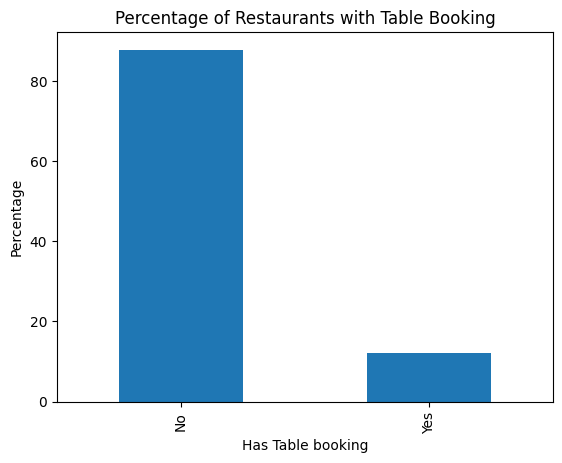

In [5]:
table_booking_counts.plot(kind="bar")
plt.title("Percentage of Restaurants with Table Booking")
plt.ylabel("Percentage")
plt.show()

In [7]:
online_delivery_counts = df["Has Online delivery"].value_counts(normalize=True) * 100
online_delivery_counts


Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

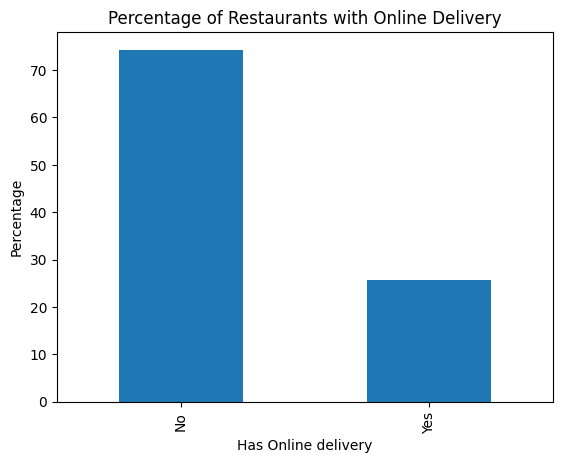

In [8]:
online_delivery_counts.plot(kind="bar")
plt.title("Percentage of Restaurants with Online Delivery")
plt.ylabel("Percentage")
plt.show()


In [9]:
df.groupby("Has Table booking")["Aggregate rating"].mean()


Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

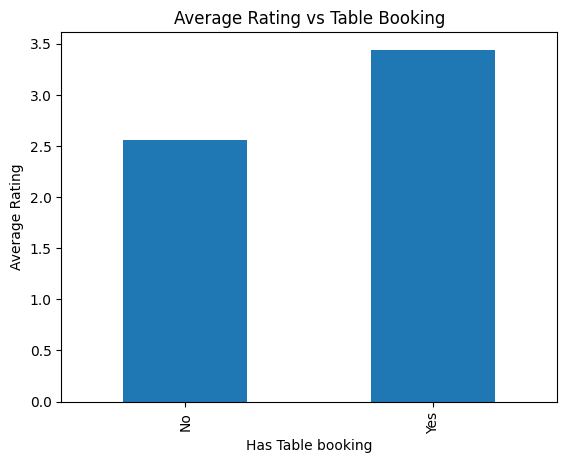

In [10]:
df.groupby("Has Table booking")["Aggregate rating"].mean().plot(kind="bar")
plt.title("Average Rating vs Table Booking")
plt.ylabel("Average Rating")
plt.show()


In [11]:
df.groupby("Price range")["Has Online delivery"].value_counts(normalize=True) * 100


Price range  Has Online delivery
1            No                     84.225923
             Yes                    15.774077
2            No                     58.689367
             Yes                    41.310633
3            No                     70.809659
             Yes                    29.190341
4            No                     90.955631
             Yes                     9.044369
Name: proportion, dtype: float64

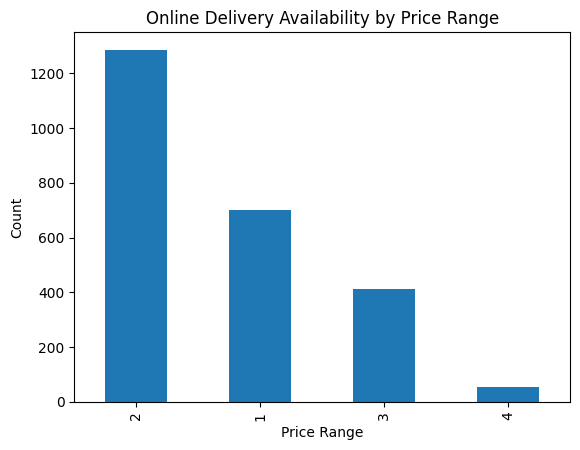

In [12]:
delivery_price = df[df["Has Online delivery"] == "Yes"]["Price range"].value_counts()

delivery_price.plot(kind="bar")
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()


### Insights

- Only a certain percentage of restaurants offer table booking and online delivery services.
- Restaurants with table booking generally tend to have higher average ratings.
- Online delivery is more commonly available in mid-range priced restaurants compared to very low or very high price ranges.


## Level 2 – Task 2: Price Range Analysis

This task analyzes restaurant price ranges and examines their relationship with aggregate ratings.


In [13]:
df["Price range"].value_counts()


Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [14]:
avg_rating_price = df.groupby("Price range")["Aggregate rating"].mean()
avg_rating_price


Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

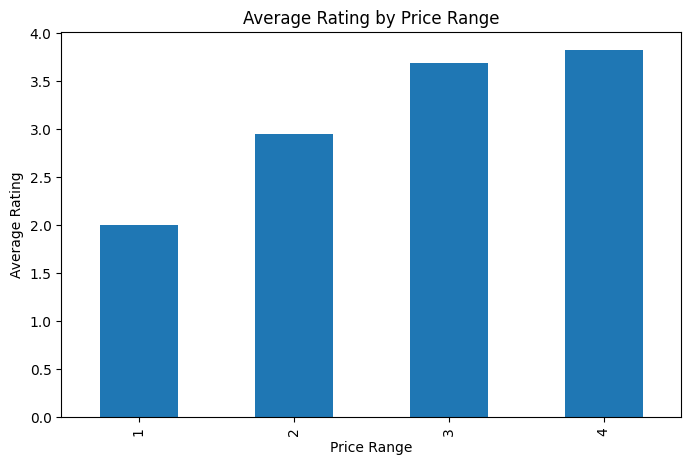

In [15]:
plt.figure(figsize=(8,5))
avg_rating_price.plot(kind="bar")
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()


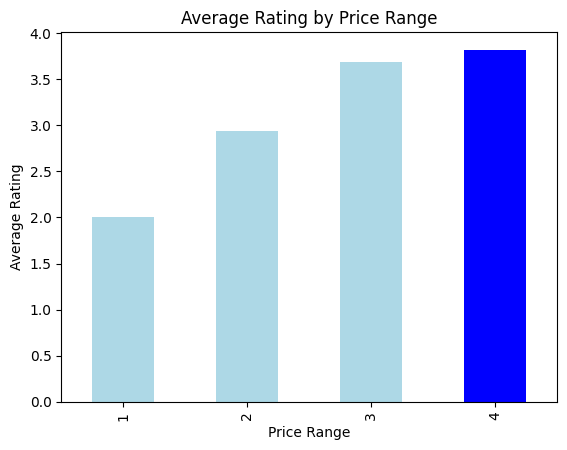

In [19]:
avg_rating_price.idxmax(), avg_rating_price.max()
colors = ["lightblue", "lightblue", "lightblue", "blue"] 
avg_rating_price.plot(kind="bar", color=colors)
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()


### Insights

- The most common price range among restaurants is the mid-range category.
- Higher price range restaurants tend to have better average ratings.
- The price range with the highest average rating is visually represented by a darker color in the plot.


## Level 2 – Task 3: Feature Engineering

Feature engineering involves creating new meaningful features from existing data to improve analysis and model performance.


In [20]:
df["Restaurant Name Length"] = df["Restaurant Name"].str.len()
df[["Restaurant Name", "Restaurant Name Length"]].head()


,Restaurant Name,Restaurant Name Length
0,Le Petit Souffle,16
1,Izakaya Kikufuji,16
2,Heat - Edsa Shangri-La,22
3,Ooma,4
4,Sambo Kojin,11


In [21]:
df["Address Length"] = df["Address"].str.len()
df[["Address", "Address Length"]].head()


,Address,Address Length
0,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


In [22]:
df["Has Table Booking"] = df["Has Table booking"].map({"Yes": 1, "No": 0})
df[["Has Table booking", "Has Table Booking"]].head()


,Has Table booking,Has Table Booking
0,Yes,1
1,Yes,1
2,Yes,1
3,No,0
4,Yes,1


In [23]:
df["Has Online Delivery"] = df["Has Online delivery"].map({"Yes": 1, "No": 0})
df[["Has Online delivery", "Has Online Delivery"]].head()


,Has Online delivery,Has Online Delivery
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0


In [24]:
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


### Feature Engineering Insights

- Additional features such as restaurant name length and address length were extracted to capture textual information.
- Binary features were created for table booking and online delivery to enable easier analysis and modeling.
- These engineered features enhance the dataset’s usability for predictiveWEIJOZBQZ
